<a href="https://colab.research.google.com/github/o2204/Fashion-Mnist/blob/main/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OverView On Project
Fashion-MNIST is a dataset comprising of 28×28 grayscale images of 70,000 fashion products from 10 categories, with 7,000 images per category. The training set has 60,000 images and the test set has 10,000 images. Fashion-MNIST shares the same image size, data format and the structure of training and testing splits with the original MNIST. The data has
T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot


---
***Steps Used :-***


1.   Download arabic-reshaper , bidi For Arabic Visuilaztion
2.   Import Laribaries
3.   Load data
4.   EDA
5.   Create Model
6.   Evaluate
7.   Prediction





## Download arabic-reshaper , bidi For Arabic Visuilaztion

In [18]:
!pip install arabic-reshaper python-bidi

## Import Laribaries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers , models , datasets
from tensorflow.keras.callbacks import EarlyStopping

## Load data

In [20]:
(train_images,train_labels),(test_image,test_labels) = datasets.fashion_mnist.load_data()

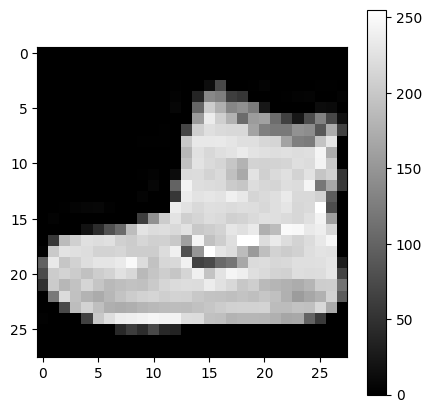

In [21]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

## EDA

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names_ar = ['تي شيرت/توب', 'بنطال', 'بلوزة', 'فستان', 'معطف',
               'صندل', 'قميص', 'حذاء رياضي', 'حقيبة', 'حذاء الكاحل']


In [23]:
print(train_images.shape)
print(train_labels.shape)
print(test_image.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


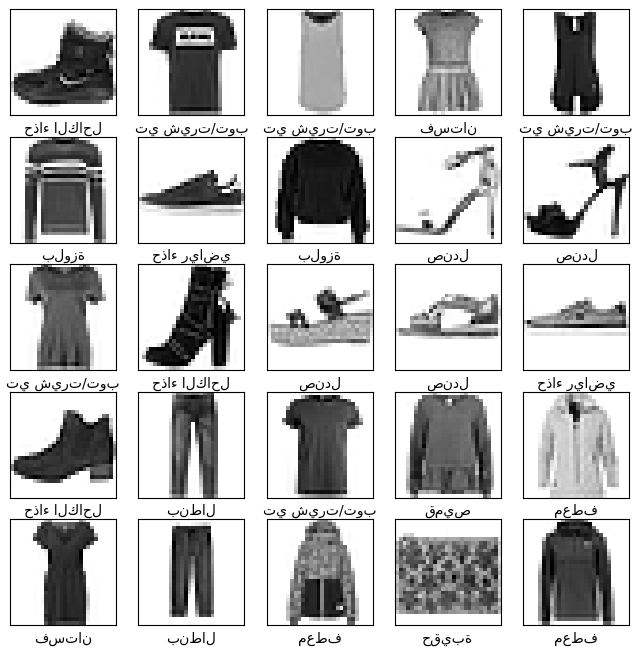

In [24]:
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  # plt.xlabel(class_names[train_labels[i]]) --> that shows the English Classes
  plt.xlabel(class_names_ar[train_labels[i]]) # --> in this code we try using matplotlib to show arabic classes but it doesn't work

plt.show()

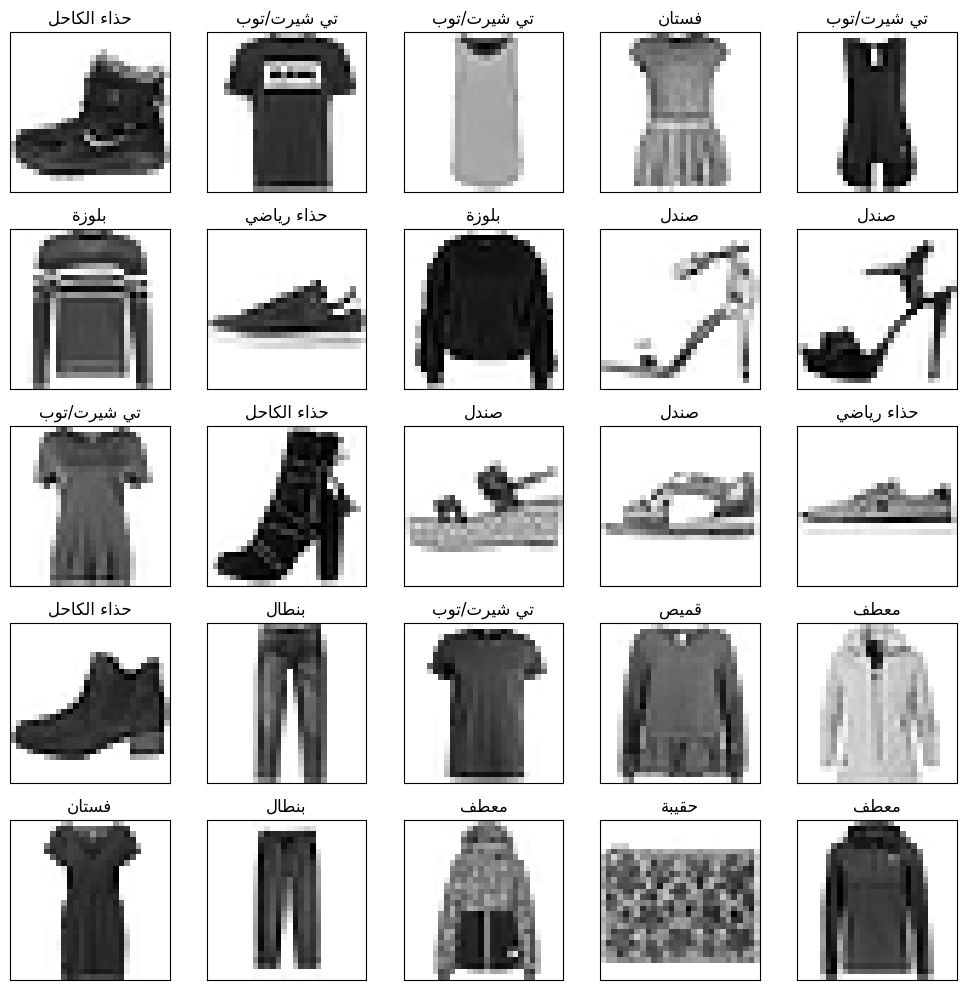

In [25]:
# Using arabic_reshaper,bidi for Arabic
import arabic_reshaper
from bidi.algorithm import get_display

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)


    label_ar = class_names_ar[train_labels[i]] # get the arabic class name corresponding to the label of the current image (i)
    reshaped_text = arabic_reshaper.reshape(label_ar) # reshapes the Arabic text to make it appear connected
    bidi_text = get_display(reshaped_text) # text direction so that the Arabic text appears right-to-left as it should

    plt.title(bidi_text, fontsize=12) # write title using arabic and fontsize = 12

plt.tight_layout()
plt.show()

In [26]:
train_images = train_images / 255.0
test_image = test_image / 255.0

In [ ]:
train_images[0]

## Create CNN

In [28]:
model = models.Sequential([
   layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),  # the images is gray scale
   layers.MaxPooling2D((2,2)),

   layers.Conv2D(32,(3,3),activation='relu'),
   layers.MaxPooling2D((2,2)),
   layers.Dropout(0.5),

   layers.Conv2D(64,(3,3),activation='relu'),
   layers.MaxPooling2D((2,2)),

   layers.Flatten(),
   layers.Dense(128,activation='relu'),
   layers.Dropout(0.7),
   layers.Dense(10,activation='softmax')
])

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,906 (128.54 KB)

 Trainable params: 32,906 (128.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
early_stop = EarlyStopping(
    monitor='val_accuracy',  # or 'val_loss'
    patience=5,
    restore_best_weights=True
)

history = model.fit(train_images,train_labels,epochs=30, batch_size=32,
          validation_split=0.2,callbacks=[early_stop])

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.5203 - loss: 1.2717 - val_accuracy: 0.7778 - val_loss: 0.5845
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.7444 - loss: 0.6986 - val_accuracy: 0.8059 - val_loss: 0.5174
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7759 - loss: 0.6244 - val_accuracy: 0.8188 - val_loss: 0.4769
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.7956 - loss: 0.5839 - val_accuracy: 0.8324 - val_loss: 0.4451
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.8025 - loss: 0.5578 - val_accuracy: 0.8414 - val_loss: 0.4227
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8072 - loss: 0.5370 - val_accuracy: 0.8447 - val_loss: 0.4080
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.8170 - loss: 0.5106 - val_accuracy: 0.8461 - val_loss: 0.3999
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.8190 -

## Evaluate

In [32]:
test_loss, test_acc = model.evaluate(test_image, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8723 - loss: 0.3480
Test accuracy: 0.8741999864578247


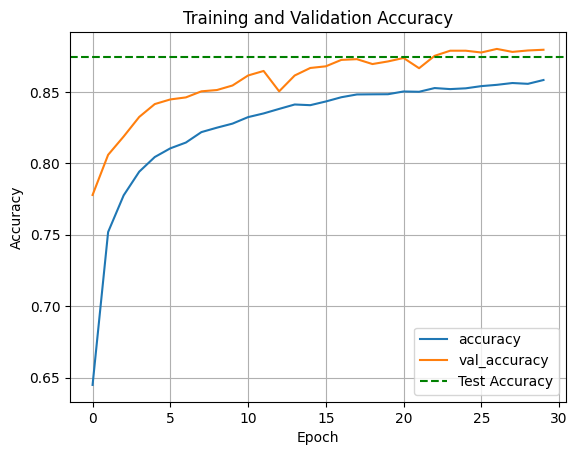

In [33]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.axhline(y=test_acc,color='g',linestyle='--',label='Test Accuracy')
plt.legend(loc='lower right')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()

## Prediction

In [34]:
predictions = model.predict(test_image)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[1.1528552e-08 3.1760925e-13 1.2164181e-12 6.9866446e-10 5.0791411e-12
 5.2101561e-04 5.3634328e-09 6.1079938e-02 1.7403975e-10 9.3839902e-01]
9
9


In [35]:
predictions = model.predict(test_image)
print(predictions[200])
print(np.argmax(predictions[200]))
print(test_labels[200])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[1.9967718e-08 9.9999994e-01 1.2376890e-10 3.6242071e-08 1.5362946e-10
 6.5672404e-18 3.5577710e-08 7.3745173e-32 4.3579489e-12 3.1706559e-22]
1
1


In [36]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    plt.title(f"True: {get_display(arabic_reshaper.reshape(class_names_ar[true_label]))}", fontsize=13, color='black')

    # plt.title(f"True: {class_names[true_label]}", fontsize=13, color='black') ## Using English on Visulization

    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel("{} {:2.0f}%".format(get_display(arabic_reshaper.reshape((class_names_ar)[predicted_label])),
                                    100*np.max(predictions_array)),color=color,fontsize=12)

    # plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
    #                                 100*np.max(predictions_array),color=color,fontsize=12)) ## Using English on Visulization


In [37]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plot = plt.bar(range(10), predictions_array, color="#777777")
  plt.xticks(range(10), [get_display(arabic_reshaper.reshape(name)) for name in class_names_ar], rotation=45, fontsize=10)

  # plt.xticks(range(10), class_names, rotation=45, fontsize=10)  ## Using English on Visulization

  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  plot[predicted_label].set_color('red')
  plot[true_label].set_color('blue')

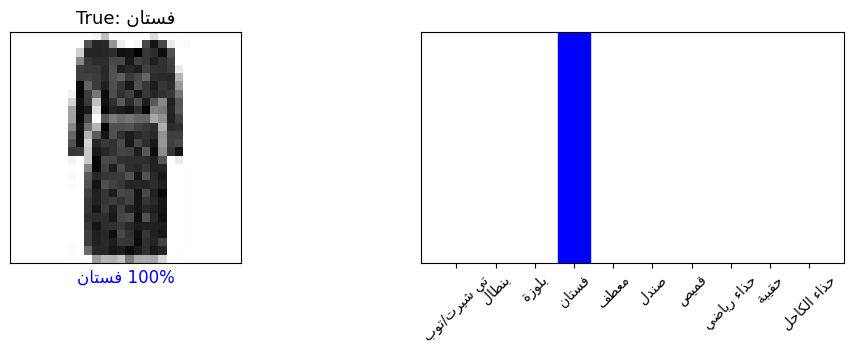

In [38]:
i = 277
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_image)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

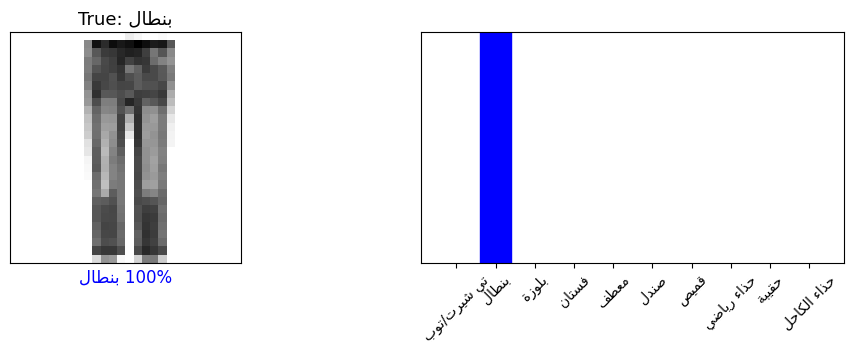

In [39]:
i = 15
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_image)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()